In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pathlib
data_directory = pathlib.Path('dataset/asl_alphabet_train');
len(list(data_directory.glob('*/*.jpg')))

204924

In [3]:
import os
folder_names = [name for name in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, name))]


In [4]:
folder_names = sorted(folder_names, key=lambda x: (x[0].islower(), x))
folder_names[:2], folder_names[26:]

(['A', 'B'], ['del', 'nothing', 'space'])

In [5]:
alphabet_images_dict = {
    folder: list(data_directory.glob(f"{folder}/*"))
    for folder in os.listdir(data_directory)
    if(data_directory / folder).is_dir()
}
total_images_dict = sum(len(images) for images in alphabet_images_dict.values())
total_images_dict

223074

In [6]:
alphabet_labels_dict = {
    folder: index for index, folder in enumerate(folder_names)
}
alphabet_labels_dict['A'], alphabet_labels_dict['B']

(0, 1)

In [7]:
img = cv2.imread(str(alphabet_images_dict['A'][0]))
img.shape

(1920, 1920, 3)

In [8]:
X = np.zeros((total_images_dict, 64, 64, 3), dtype=np.float32)
y = np.zeros(total_images_dict, dtype=int)

idx = 0
for alphabet, images in alphabet_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(64, 64))
        X[idx] = resized_img
        y[idx] = alphabet_labels_dict[alphabet]
        idx += 1

In [9]:
X_scaled = X / 255

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=0)

In [11]:
num_classes = 29

# Model Definition
model = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.05, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    return noisy_image

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    preprocessing_function=add_noise,
    shear_range=0.1,
    horizontal_flip=False
)

# Train the Model
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  
    epochs=31,
    steps_per_epoch=len(X_train) // 32  # Ensures one full pass over the dataset per epoch
)


Epoch 1/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 891s 150ms/step - accuracy: 0.4144 - loss: 1.9842
Epoch 2/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.7812 - loss: 0.7362     
Epoch 3/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 840s 142ms/step - accuracy: 0.7877 - loss: 0.6643
Epoch 4/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.8125 - loss: 0.5272     
Epoch 5/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 837s 141ms/step - accuracy: 0.8328 - loss: 0.5180
Epoch 6/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.7500 - loss: 0.6569     
Epoch 7/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 836s 141ms/step - accuracy: 0.8536 - loss: 0.4541
Epoch 8/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.8125 - loss: 0.5593     
Epoch 9/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 842s 142ms/step - accuracy: 0.8639 - loss: 0.4165
Epoch 10/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.8438 - loss: 0.3754     
Epoch 11/31
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 841s 142ms/step - accuracy: 0.8

In [25]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  
    epochs=9,
    steps_per_epoch=len(X_train) // 32  # Ensures one full pass over the dataset per epoch
)

Epoch 1/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 975s 165ms/step - accuracy: 0.9098 - loss: 0.2779
Epoch 2/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.8438 - loss: 0.3712     
Epoch 3/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 715s 121ms/step - accuracy: 0.9106 - loss: 0.2731
Epoch 4/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step - accuracy: 0.9062 - loss: 0.2144     
Epoch 5/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 716s 121ms/step - accuracy: 0.9125 - loss: 0.2691
Epoch 6/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.8125 - loss: 0.5680     
Epoch 7/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 719s 121ms/step - accuracy: 0.9144 - loss: 0.2628
Epoch 8/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step - accuracy: 0.8438 - loss: 0.6248     
Epoch 9/9
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 721s 122ms/step - accuracy: 0.9155 - loss: 0.2591


In [26]:
model.evaluate(X_test, y_test)

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9648 - loss: 0.1066


[0.1084880381822586, 0.9649751782417297]

In [27]:
X_test.shape, X_train.shape

((33462, 64, 64, 3), (189612, 64, 64, 3))

In [28]:
predictions = model.predict(X_test)

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step


1046/1046 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step


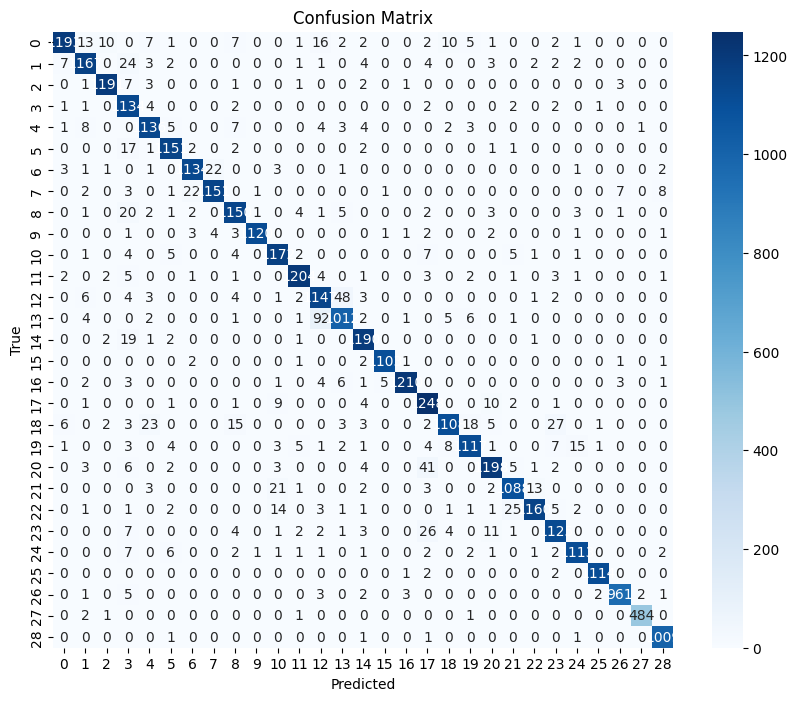

'              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96      1273\n           1       0.96      0.95      0.96      1222\n           2       0.99      0.98      0.98      1210\n           3       0.89      0.99      0.94      1149\n           4       0.96      0.97      0.96      1174\n           5       0.97      0.98      0.98      1177\n           6       0.97      0.97      0.97      1169\n           7       0.98      0.96      0.97      1196\n           8       0.96      0.96      0.96      1196\n           9       1.00      0.98      0.99      1139\n          10       0.95      0.98      0.96      1202\n          11       0.98      0.98      0.98      1231\n          12       0.90      0.94      0.92      1221\n          13       0.93      0.90      0.92      1127\n          14       0.96      0.98      0.97      1216\n          15       0.99      0.99      0.99      1111\n          16       0.99      0.98      0.99      1236\n       

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report(y_test, y_pred)


In [30]:
y_pred = np.argmax(model.predict(X_test), axis=1)


1046/1046 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step


In [31]:
y_pred[:15], y_test[:15]

(array([22, 21, 27,  8, 26, 13, 18, 16, 10,  6,  2, 10, 19, 20, 22],
       dtype=int64),
 array([22, 21, 27,  8, 26, 13, 18, 16, 10,  6,  2, 10, 19, 20, 22]))

In [32]:
test_directory = pathlib.Path('dataset/asl_alphabet_test');
len(list(test_directory.glob('*/*.jpg')))

29

In [33]:
jpg_files = [str(file) for file in test_directory.glob('*/*.jpg')]
jpg_files

['dataset\\asl_alphabet_test\\A\\A_test.jpg',
 'dataset\\asl_alphabet_test\\B\\B_test.jpg',
 'dataset\\asl_alphabet_test\\C\\C_test.jpg',
 'dataset\\asl_alphabet_test\\D\\D_test.jpg',
 'dataset\\asl_alphabet_test\\del\\del_test.jpg',
 'dataset\\asl_alphabet_test\\E\\E_test.jpg',
 'dataset\\asl_alphabet_test\\F\\F_test.jpg',
 'dataset\\asl_alphabet_test\\G\\G_test.jpg',
 'dataset\\asl_alphabet_test\\H\\H_test.jpg',
 'dataset\\asl_alphabet_test\\I\\I_test.jpg',
 'dataset\\asl_alphabet_test\\J\\J_test.jpg',
 'dataset\\asl_alphabet_test\\K\\K_test.jpg',
 'dataset\\asl_alphabet_test\\L\\L_test.jpg',
 'dataset\\asl_alphabet_test\\M\\M_test.jpg',
 'dataset\\asl_alphabet_test\\N\\N_test.jpg',
 'dataset\\asl_alphabet_test\\nothing\\nothing_test.jpg',
 'dataset\\asl_alphabet_test\\O\\O_test.jpg',
 'dataset\\asl_alphabet_test\\P\\P_test.jpg',
 'dataset\\asl_alphabet_test\\Q\\Q_test.jpg',
 'dataset\\asl_alphabet_test\\R\\R_test.jpg',
 'dataset\\asl_alphabet_test\\S\\S_test.jpg',
 'dataset\\asl_alp

In [34]:
predictions_dict = {}
for i in jpg_files:
    img = cv2.imread(i)
    resized_img = cv2.resize(img,(64,64))
    scaled_img = resized_img.astype(np.float32) / 255.0
    scaled_img = np.expand_dims(scaled_img, axis=0)
    pred = np.argmax(model.predict(scaled_img))
    predictions_dict[i] = pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

In [35]:
predictions_dict

{'dataset\\asl_alphabet_test\\A\\A_test.jpg': 0,
 'dataset\\asl_alphabet_test\\B\\B_test.jpg': 1,
 'dataset\\asl_alphabet_test\\C\\C_test.jpg': 2,
 'dataset\\asl_alphabet_test\\D\\D_test.jpg': 3,
 'dataset\\asl_alphabet_test\\del\\del_test.jpg': 26,
 'dataset\\asl_alphabet_test\\E\\E_test.jpg': 4,
 'dataset\\asl_alphabet_test\\F\\F_test.jpg': 5,
 'dataset\\asl_alphabet_test\\G\\G_test.jpg': 6,
 'dataset\\asl_alphabet_test\\H\\H_test.jpg': 7,
 'dataset\\asl_alphabet_test\\I\\I_test.jpg': 8,
 'dataset\\asl_alphabet_test\\J\\J_test.jpg': 9,
 'dataset\\asl_alphabet_test\\K\\K_test.jpg': 10,
 'dataset\\asl_alphabet_test\\L\\L_test.jpg': 11,
 'dataset\\asl_alphabet_test\\M\\M_test.jpg': 12,
 'dataset\\asl_alphabet_test\\N\\N_test.jpg': 13,
 'dataset\\asl_alphabet_test\\nothing\\nothing_test.jpg': 27,
 'dataset\\asl_alphabet_test\\O\\O_test.jpg': 14,
 'dataset\\asl_alphabet_test\\P\\P_test.jpg': 15,
 'dataset\\asl_alphabet_test\\Q\\Q_test.jpg': 16,
 'dataset\\asl_alphabet_test\\R\\R_test.jpg'

In [36]:
for key, value in predictions_dict.items():
    for alpha, label in alphabet_labels_dict.items():
        if value == label:
            predictions_dict[key] = alpha

In [37]:
predictions_dict

{'dataset\\asl_alphabet_test\\A\\A_test.jpg': 'A',
 'dataset\\asl_alphabet_test\\B\\B_test.jpg': 'B',
 'dataset\\asl_alphabet_test\\C\\C_test.jpg': 'C',
 'dataset\\asl_alphabet_test\\D\\D_test.jpg': 'D',
 'dataset\\asl_alphabet_test\\del\\del_test.jpg': 'del',
 'dataset\\asl_alphabet_test\\E\\E_test.jpg': 'E',
 'dataset\\asl_alphabet_test\\F\\F_test.jpg': 'F',
 'dataset\\asl_alphabet_test\\G\\G_test.jpg': 'G',
 'dataset\\asl_alphabet_test\\H\\H_test.jpg': 'H',
 'dataset\\asl_alphabet_test\\I\\I_test.jpg': 'I',
 'dataset\\asl_alphabet_test\\J\\J_test.jpg': 'J',
 'dataset\\asl_alphabet_test\\K\\K_test.jpg': 'K',
 'dataset\\asl_alphabet_test\\L\\L_test.jpg': 'L',
 'dataset\\asl_alphabet_test\\M\\M_test.jpg': 'M',
 'dataset\\asl_alphabet_test\\N\\N_test.jpg': 'N',
 'dataset\\asl_alphabet_test\\nothing\\nothing_test.jpg': 'nothing',
 'dataset\\asl_alphabet_test\\O\\O_test.jpg': 'O',
 'dataset\\asl_alphabet_test\\P\\P_test.jpg': 'P',
 'dataset\\asl_alphabet_test\\Q\\Q_test.jpg': 'Q',
 'datas

In [38]:
model.save('SignLanguageRecognition.keras')